HW4 // Sepehr Ashrafzadeh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

In [2]:
df = pd.read_excel('C:\\Users\\Asus\\Downloads\\ToyotaCorolla.xls', sheet_name='data')
df = df.drop(columns = ["Model" , "Id"])
df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,0,0,0,1,0,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,0,1,0,0,0,1,0,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,1,0,0,0,1,0,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,1,0,0,0,1,0,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,0,1,0,1,0,0,0,0


In [3]:
print(df.isnull().sum())
print("Missing Value Count : " , df.isnull().sum().sum())

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64
Missing Value Count :  0


In [4]:
df.corr().head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,0.044375,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,-0.048172,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,0.007113,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,0.047171,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,-0.064318,0.084153


In [5]:
color_one_hot = pd.get_dummies(df.Color)
fuel_one_hot = pd.get_dummies(df.Fuel_Type)
df = df.drop(columns = ["Color" , "Fuel_Type"])
one_hots = color_one_hot.join(fuel_one_hot)
df = df.join(one_hots)
df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Green,Grey,Red,Silver,Violet,White,Yellow,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,0,0,0,0,0,0,0,1,0


In [6]:
seventy_percent = int((70 * df.shape[0]) / 100) + 1  #1006
fifteen_percent = int ((df.shape[0] - seventy_percent) / 2)  # 215

df = df.sample(frac = 1)
df_features = df.drop(columns =["Price"])
df_target = pd.DataFrame(df["Price"])

#normalize
#df_target =( df_target - df_target.mean()) / df_target.std()

x_train = df_features[:seventy_percent]
x_validation = df_features[seventy_percent : seventy_percent + fifteen_percent]
x_test = df_features[seventy_percent + fifteen_percent : seventy_percent + 2*fifteen_percent]

y_train = df_target[:seventy_percent]
y_validation = df_target[seventy_percent : seventy_percent + fifteen_percent]
y_test = df_target[seventy_percent + fifteen_percent : seventy_percent + 2*fifteen_percent]

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)


(1006, 47)
(215, 47)
(215, 47)


<div dir='rtl'>
  PART ONE
</div>

In [7]:
def predict(x , w):
    return np.dot(x , w)

def sgd(x_train, y_train, x_validation, y_validation, x_test, y_test, learn_rate, iterations):
    validation_mse = []
    test_mse = []
    w = np.ones(x_train.shape[1])
    for i in range(iterations):
        for j in range(len(x_train)):
            rnd_ind = randint(0, len(x_train) - 1)
            y_pred = np.dot(x_train[rnd_ind],w)
            w -= 2  * x_train[rnd_ind] * (y_pred - y_train[rnd_ind]) * learn_rate
            
        validation_mse.append(np.square(y_validation.to_numpy() - predict(x_validation, w)).mean())
        test_mse.append(np.square(y_test.to_numpy() - predict(x_test,w)).mean())
    
    return validation_mse, test_mse, w

mse_val, mse_test, w_part1 = sgd(x_train.to_numpy(), y_train.to_numpy(), x_validation, y_validation, x_test, y_test,10 ** -12, 400 )
mse_test

[21500917.18224264,
 20243225.17377136,
 22378970.561560407,
 20711765.372598905,
 19627782.026910353,
 20254445.110602506,
 20962891.871186778,
 19743554.623691358,
 19849499.421974644,
 21124216.60726423,
 21328235.31012643,
 20525641.67959521,
 19548460.40852316,
 19607610.947770655,
 18982057.027036235,
 18503692.459238827,
 19379013.05597221,
 20199823.36063005,
 20045416.90311503,
 18899214.044306185,
 20418413.294007875,
 19416673.010039423,
 18895267.338350564,
 19953738.93701683,
 18864494.65195989,
 18079270.860734176,
 18360460.974915247,
 19373172.989965793,
 17902642.4597267,
 18526610.899807163,
 18671660.507916108,
 18527472.089863688,
 18482161.203292403,
 18103773.227208514,
 18959746.937073972,
 19307417.361451115,
 17225425.52601005,
 18129825.975117624,
 17052550.698671717,
 19233969.025360648,
 17068866.460677434,
 18339350.57486221,
 18808799.87181677,
 18815926.75197509,
 18256307.797197346,
 18343434.066124577,
 17126910.527018175,
 17227087.482318617,
 17520152

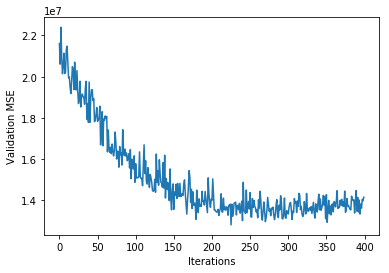

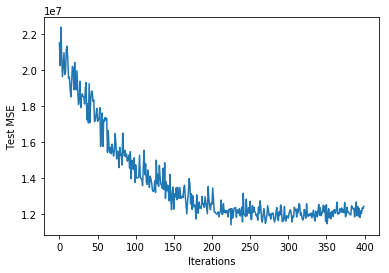

MSE for test data: 12410952.186484352


In [8]:
x = np.arange(len(mse_val))

plt.plot(x, mse_val)
plt.xlabel('Iterations')
plt.ylabel("Validation " + 'MSE')

plt.show()

plt.plot(x, mse_test)
plt.xlabel('Iterations')
plt.ylabel("Test " + 'MSE')

plt.show()

print('MSE for test data: {}'.format(mse_test[len(mse_test) - 1]))

<div dir='rtl'>
  PART TWO
</div>

In [9]:
def ridge(x,y , lan):
    if lan == 1:
        return np.dot(np.linalg.inv(np.add(np.dot(x.T,x), np.identity(x.shape[1]))), np.dot(x.T, y))
    if lan == 0:
        return np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
    
w_lan1 = ridge(x_train, y_train , 1)
y_pred_train_lan1 = predict(x_train, w_lan1)
print('Train MSE : ' , np.square(y_train - y_pred_train_lan1).mean())
print('Validation MSE : ' , np.square(y_validation - predict(x_validation, w_lan1)).mean())
print('Test MSE : ' , np.square(y_test - predict(x_test, w_lan1)).mean())

Train MSE :  Price    1.125734e+06
dtype: float64
Validation MSE :  Price    1.227304e+06
dtype: float64
Test MSE :  Price    1.486896e+06
dtype: float64


<div dir='rtl'>
  PART THREE
</div>

In [10]:
def sgd_p3(x_train, y_train, x_validation, y_validation, x_test, y_test, learn_rate, iterations):
    validation_mse , test_mse= [] , []
    w = np.ones(x_train.shape[1])
    for i in range(iterations):
        for j in range(len(x_train)):
            rnd_ind = randint(0, len(x_train) - 1)
            y_pred = predict(x_train[rnd_ind],w)
            w -= x_train[rnd_ind] * (y_pred - y_train[rnd_ind])* learn_rate / abs(y_pred - y_train[rnd_ind])
            
        validation_mse.append(np.square(y_validation.to_numpy() - predict(x_validation, w)).mean())
        test_mse.append(np.square(y_test.to_numpy() - predict(x_test,w)).mean())
    
    return validation_mse, test_mse, w
mse_val, mse_test, w_part3 = sgd_p3(x_train.to_numpy(), y_train.to_numpy(), x_validation, y_validation, x_test, y_test, 10 ** -12, 400 )
mse_test

[4504984300.471425,
 4504311337.102053,
 4503622136.808966,
 4502975604.82929,
 4502298858.562281,
 4501641371.896512,
 4500978557.847293,
 4500311708.39261,
 4499642666.90212,
 4498961417.030717,
 4498277082.868582,
 4497615843.622945,
 4496962670.3407955,
 4496290939.422393,
 4495621788.362069,
 4494939767.475258,
 4494274235.092001,
 4493603426.230999,
 4492938354.88742,
 4492263071.484329,
 4491595457.8494425,
 4490935155.099238,
 4490286747.990783,
 4489639192.374188,
 4488960707.289385,
 4488291668.861121,
 4487623719.591995,
 4486958823.18332,
 4486293488.871463,
 4485622215.689328,
 4484945793.673502,
 4484290180.00041,
 4483615213.807695,
 4482939198.892882,
 4482272707.947058,
 4481621358.83074,
 4480946233.40961,
 4480267155.113222,
 4479601119.0257,
 4478923128.371272,
 4478236001.405178,
 4477555434.145875,
 4476897955.09043,
 4476228596.09984,
 4475562277.533499,
 4474887101.401965,
 4474217145.29314,
 4473544665.0901165,
 4472877337.124917,
 4472192923.663993,
 447152942

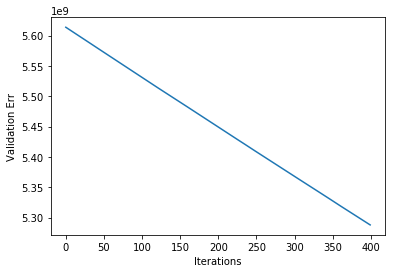

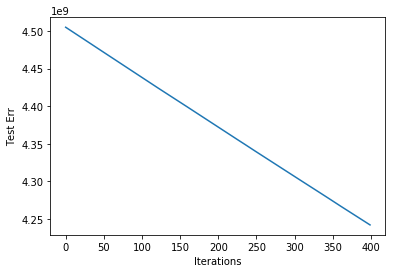

Err for test data: 4241893917.315463


In [11]:
x = np.arange(len(mse_val))

plt.plot(x, mse_val)
plt.xlabel('Iterations')
plt.ylabel("Validation " + 'Err')

plt.show()

plt.plot(x, mse_test)
plt.xlabel('Iterations')
plt.ylabel("Test " + 'Err')

plt.show()

print('Err for test data: {}'.format(mse_test[len(mse_test) - 1]))

<div dir='rtl'>
  PART FOUR
</div>

In [12]:
w_lan0 = ridge(x_train , y_train  , 0)
w_lan0

array([[ 5.68455006e+13],
       [ 5.68455007e+13],
       [ 6.82146008e+14],
       [-1.94157775e-01],
       [-3.58436777e+02],
       [-1.77469012e+05],
       [ 9.17748143e+03],
       [ 1.64406241e+00],
       [ 3.67665964e+04],
       [-3.01336433e+17],
       [ 1.04511606e+05],
       [ 4.85501153e+01],
       [-1.56939857e+02],
       [ 4.70119246e+03],
       [-3.24337012e+04],
       [-5.57742485e+02],
       [-5.67920155e+03],
       [-6.04106665e+03],
       [-4.34987246e+02],
       [-6.49278318e+02],
       [ 3.25941845e+03],
       [ 1.14650376e+03],
       [-9.03714962e+01],
       [ 6.75143866e+02],
       [-7.25564203e+02],
       [ 2.97879650e+02],
       [ 6.15874731e+03],
       [ 1.31226238e+04],
       [ 9.18462446e+03],
       [-1.36036586e+03],
       [-1.71549500e+02],
       [-9.09274285e+03],
       [-2.06190401e+04],
       [ 8.82156511e+02],
       [-1.62186476e+17],
       [-1.62186476e+17],
       [-1.62186476e+17],
       [-1.62186476e+17],
       [-1.6

In [13]:
y_pred_train_lan0 = predict(x_train, w_lan0)
print('Train MSE : ' , np.square(y_train - y_pred_train_lan0).mean())
print('Validation MSE : ' , np.square(y_validation - predict(x_validation, w_lan0)).mean())
print('Test MSE : ' , np.square(y_test - predict(x_test, w_lan0)).mean())

Train MSE :  Price    1.852185e+10
dtype: float64
Validation MSE :  Price    2.103277e+10
dtype: float64
Test MSE :  Price    1.882640e+10
dtype: float64


In [14]:
print(w_part1)
print(w_part3)

[ 1.00810513  1.00493505  2.95974596 -0.03233379  1.11478901  1.00080071
  1.00007571  2.38950572  1.00439485  1.00391237  1.00496208  1.10368092
  2.12965423  1.00073054  1.00092394  1.00505559  1.00113476  1.00099827
  1.00102639  1.00107652  1.00044796  1.00110331  1.00078097  1.00104868
  1.00106388  1.00098291  1.00010822  1.0005602   1.00051183  1.00089703
  1.00034997  1.00010437  1.00001113  1.00001742  0.99999953  1.00012818
  1.00020695  1.00003762  1.00043949  1.00005873  1.00012228  1.00000261
  0.99997513  1.00000758  0.99999203  1.00008174  1.00090433]
[0.99997772 0.99999795 0.99925306 0.97228471 0.99996213 0.99999975
 0.99999998 0.99940785 0.99999851 0.99999851 0.99999812 0.99996756
 0.99960121 0.99999984 0.99999966 0.9999987  0.9999997  0.99999964
 0.99999973 0.99999982 0.99999999 0.99999991 0.99999993 0.9999998
 0.99999981 0.99999964 0.99999994 0.99999991 0.9999999  0.99999971
 0.99999993 0.99999995 1.         0.99999989 1.         0.99999995
 0.99999993 0.99999994 0.9